In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Ellenállások Mérése, előkészületek

In [105]:
Rs0 = 0.2740
Rf = 84.45e3
print(f'A wolframizzó ellenállása kezdetben: {Rs0} Ohm volt.')
print(f'A termisztor hideg ellenállása: {Rf} Ohm volt')

tables = pd.read_html('https://fizipedia.bme.hu/index.php/H%C5%91m%C3%A9rs%C3%A9kleti_sug%C3%A1rz%C3%A1s_vizsg%C3%A1lata')
wolfram = tables[11].to_numpy()
termisztor = tables[12].to_numpy()
for i in range(len(termisztor)): termisztor[i, 1]= float(termisztor[i, 1].replace(' ', ''))
termisztor = np.array(termisztor, dtype=float)

A wolframizzó ellenállása kezdetben: 0.274 Ohm volt.
A termisztor hideg ellenállása: 84450.0 Ohm volt


In [111]:

lin = lambda x, a, b: a*x+b
[[a1, b1], cov] = curve_fit(lin, wolfram[:,0], wolfram[:,1])
def wolf(x): return a1*x+b1

fv = lambda x, a, b, c: a/np.power(x, c)+b
[[a2, b2, c2], cov] = curve_fit(fv, termisztor[:,1], termisztor[:,0], p0=[2, 1, 0.4])
def term(x): return a2/np.power(x, c2)+b2+273.15

C:\Users\schba\AppData\Local\Temp\ipykernel_24480\3003353587.py:5: RuntimeWarning: divide by zero encountered in divide
  fv = lambda x, a, b, c: a/np.power(x, c)+b


# Stefan-Boltzmann-törvény ellenőrzése magas hőmérsékletű sugárforrással
Az izzóra kapcsolt feszültséget 1 V-onként, 1 V-ról 12 V-ra növeltük, közben mértük az izzón eső feszültséget, valamint a rajta átfolyó áramot és az érzékelő termisztorának ellenállását. Az áram- és feszültségértékekből kiszámoltuk az izzó ellenállását, majd a táblázat alapján meghatároztuk a hőméréskletét. Ehhez a megadott adatokra megfelelő alakú függvényt illesztettünk.

A detektor sötétfeszültsége (ezt minden detektoros mérési adatból automatikusan levontuk: 0.00013 V
    I_izzó (A)  U_izzó (V)  R_izzó (Ohm)  U_det (V)  R_izzó/R_0        T (K)
0        0.985       1.002      1.017259    0.00007    3.712624   878.803289
1        1.309       2.004      1.530940    0.00092    5.587371  1195.674160
2        1.570       3.005      1.914013    0.00258    6.985448  1431.977935
3        1.828       4.028      2.203501    0.00537    8.041975  1610.552711
4        2.039       4.997      2.450711    0.00809    8.944201  1763.047540
5        2.244       6.033      2.688503    0.01148    9.812054  1909.732442
6        2.420       6.982      2.885124    0.01497   10.529650  2031.020925
7        2.600       8.040      3.092308    0.01932   11.285794  2158.824985
8        2.760       9.001      3.261232    0.02327   11.902306  2263.028139
9        2.921      10.010      3.426909    0.02783   12.506966  2365.228040
10       3.070      11.003      3.584039    0.03276  

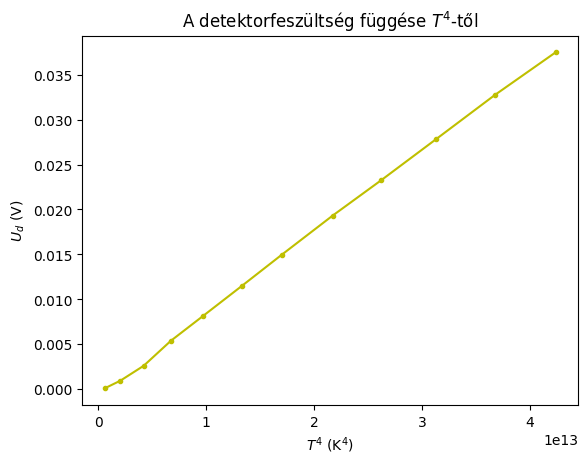

In [90]:
hatter = 0.13e-3

Is = np.array([0.985, 1.309, 1.570, 1.828, 2.039, 2.244, 2.420, 2.600, 2.760, 2.921, 3.070, 3.211])
Us = np.array([1.002, 2.004, 3.005, 4.028, 4.997, 6.033, 6.982, 8.040, 9.001, 10.010, 11.003, 11.973])
Ud = np.array([0.20, 1.05, 2.71, 5.50, 8.22, 11.61, 15.10, 19.45, 23.40, 27.96, 32.89, 37.64])*1e-3 -hatter

print(f'A detektor sötétfeszültsége (ezt minden detektoros mérési adatból automatikusan levontuk: {hatter} V')

Rs = Us/Is
Rrel = Rs/Rs0
hom2 = wolf(Rrel)
print(pd.DataFrame({'I_izzó (A)': Is, 'U_izzó (V)': Us, 'R_izzó (Ohm)': Rs, 'U_det (V)': Ud, 'R_izzó/R_0': Rrel, 'T (K)': hom2}))

fig, ax = plt.subplots()
ax.plot(hom2**4, Ud, 'y.-')
ax.set_xlabel(r'$T^4$ (K$^4$)')
ax.set_ylabel(r'$U_d$ (V)')
ax.set_title(r'A detektorfeszültség függése $T^4$-től')
plt.show()

# Pontszerű forrás sugárzási intenzitásának távolságfüggése
6 cm-es távolságról indulva 1 cm-enként távolítottuk az izzót a detektortól, eközben mérve a detektor feszültségét.

    Távolság (m)  U_det (V)
0           0.06    0.03751
1           0.07    0.02873
2           0.08    0.02136
3           0.09    0.01670
4           0.10    0.01436
5           0.11    0.01195
6           0.12    0.01013
7           0.13    0.00868
8           0.14    0.00752
9           0.15    0.00680
10          0.16    0.00540
11          0.17    0.00484
12          0.18    0.00451
13          0.19    0.00423
14          0.20    0.00386
15          0.21    0.00344
16          0.22    0.00316
17          0.23    0.00299
18          0.24    0.00274
19          0.25    0.00264
20          0.26    0.00234
21          0.27    0.00225


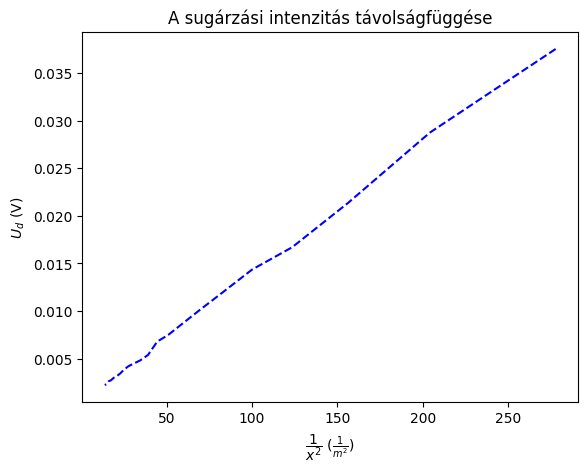

In [94]:
X = np.linspace(6, 27, 22)*1e-2
Ud2 = np.array([37.64, 28.86, 21.49, 16.83, 14.49, 12.08, 10.26, 8.81, 7.65, 6.93, 5.53, 4.97, 4.64, 4.36, 3.99, 3.57, 3.29, 3.12, 2.87, 2.77, 2.47, 2.38])*1e-3 - hatter

print(pd.DataFrame({'Távolság (m)': X, 'U_det (V)': Ud2}))

fig, ax = plt.subplots()
ax.plot(1/X**2, Ud2, 'b--')
ax.set_xlabel(r'$\dfrac{1}{x^2}$ ($\frac{1}{m^2}$)')
ax.set_ylabel(r'$U_d$ (V)')
ax.set_title('A sugárzási intenzitás távolságfüggése')
plt.show()

# Stefan-Boltzmann-törvény ellenőrzése alacsony hőmérsékletű sugárforrással
A detektor elé heyeztük az alacsony hőmérsékletű sugárforrást, majd magas fokozatra kapcsoltuk azt. Ezután percenként forgattuk a forrást és minden oldalnál feljegyeztük a detektor feszültségét és a kocka ellenállását (melyből hőmérsékletét meghatároztuk).

A kocka hőmérséklete kezdetben: 302.88 °C volt.


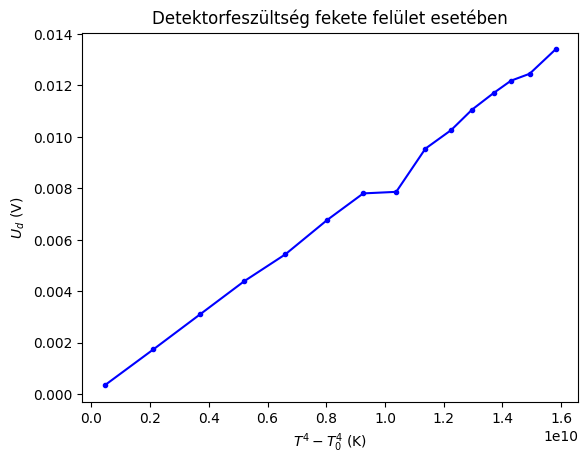

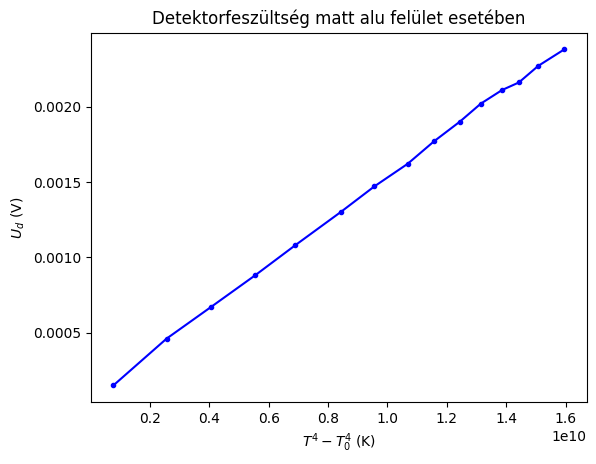

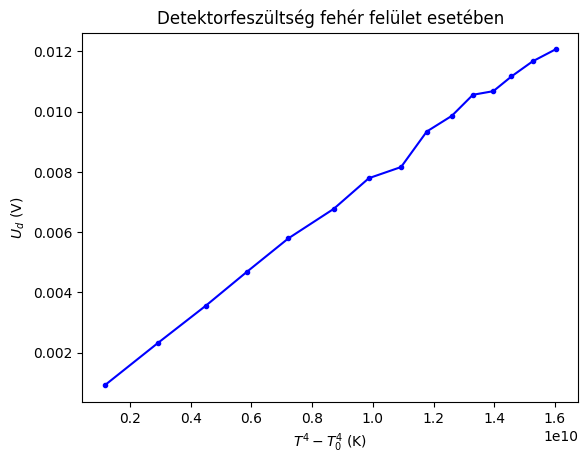

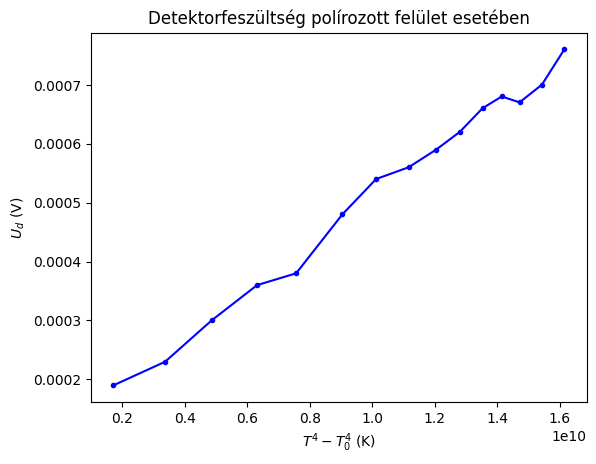

In [112]:
Rf2 = 80.13e3
T40 = term(Rf2)
print(f'A kocka hőmérséklete kezdetben: {np.round(term(Rf2),2)} °C volt.')
# fekete oldallal kezdtünk
#2. matt alu, 3. fehér, 4. polír
R = np.array([[66.9, 37.60, 23.8, 16.4, 12.10, 9.15, 7.36, 6.12, 5.25, 4.62, 4.18, 3.79, 3.51, 3.24, 2.91], [59.34, 32.8, 21.7, 15.2, 11.4, 8.52, 7.0, 5.84, 5.1, 4.50, 4.08, 3.71, 3.45, 3.18, 2.86], [51.46, 29.5, 19.4, 14.2, 10.7, 8.1, 6.65, 5.62, 4.95, 4.40, 4.0, 3.66, 3.39, 3.11, 2.84], [42.61, 26.00, 17.8, 12.85, 10.0, 7.64, 6.38, 5.42, 4.76, 4.28, 3.88, 3.58, 3.33, 3.05, 2.8]])*1e3
U = np.array([[0.34, 1.74, 3.1, 4.39, 5.43, 6.77, 7.8, 7.86, 9.54, 10.26, 11.06, 11.7, 12.18, 12.45, 13.4], [0.15, 0.46, 0.67, 0.88, 1.08, 1.30, 1.47, 1.62, 1.77, 1.90, 2.02, 2.11, 2.16, 2.27, 2.38], [0.91, 2.32, 3.56, 4.68, 5.79, 6.77, 7.79, 8.16, 9.34, 9.86, 10.56, 10.68, 11.17, 11.67, 12.07], [0.19, 0.23, 0.30, 0.36, 0.38, 0.48, 0.54, 0.56, 0.59, 0.62, 0.66, 0.68, 0.67, 0.70, 0.76]])*1e-3

titles = ['fekete', 'matt alu', 'fehér', 'polírozott']

T4 = term(R)
for i in range(4):
    fig, ax = plt.subplots()
    ax.plot(T4[i]**4-T40**4, U[i], 'b.-')
    ax.set_xlabel(r'$T^4-T_0^4$ (K)')
    ax.set_ylabel(r'$U_d$ (V)')
    ax.set_title(f'Detektorfeszültség {titles[i]} felület esetében')
    plt.show()

# Abszorpciós tényezők meghatározása
A felmelegedett kocka fekete oldalát néztük az abszorpciós detektorral, melynek szegmensegit $\approx 15$ másodpercenként váltogattuk. Feljegyeztük a különböző időpillanatokhoz tartozó ellenállás értékeket.

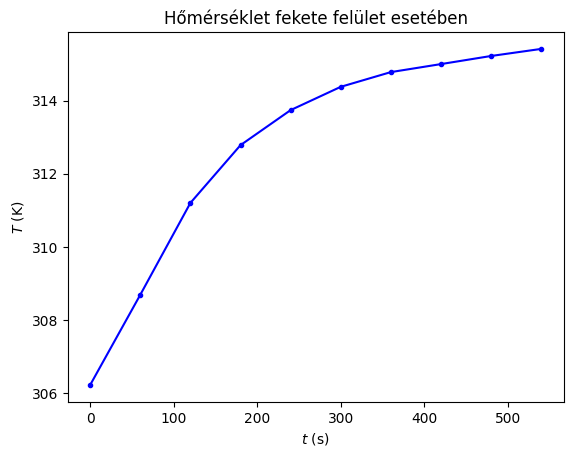

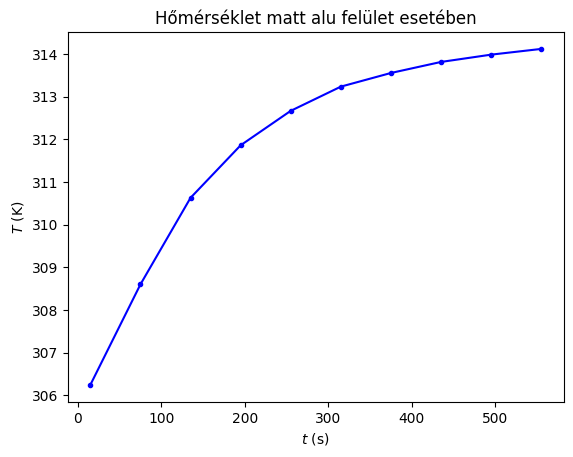

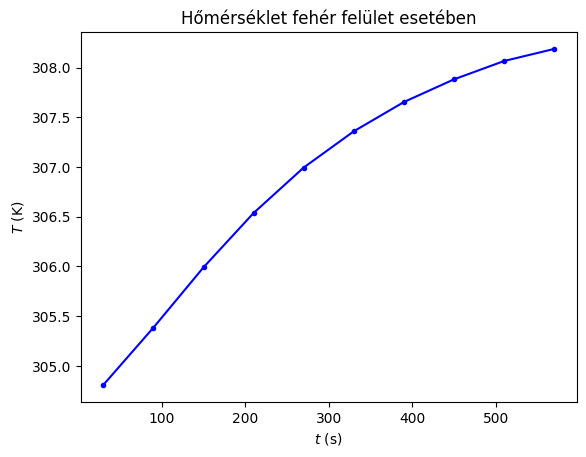

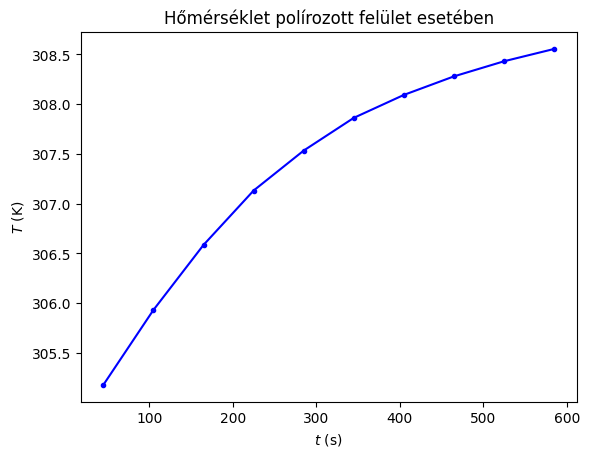

In [113]:
# sorrend: black, white, polish, matt
t = np.arange(0, 10*60, 15).reshape([10, 4]).transpose()
R4 = np.array([[68.9, 61.76, 55.34, 51.69, 49.61, 48.28, 47.46, 47.02, 46.58, 46.2], [68.83, 62.0, 56.73, 53.78, 51.94, 50.69, 50.0, 49.45, 49.09, 48.81], [73.42, 71.54, 69.62, 67.94, 66.57, 65.5, 64.65, 64.0, 63.48, 63.14], [72.21, 69.81, 67.8, 66.17, 65.0, 64.06, 63.41, 62.89, 62.47, 62.13]])*1e3
# utcsó: 45.94

T5 = term(R4)

for i in range(4):
    fig, ax = plt.subplots()
    ax.plot(t[i], T5[i], 'b.-')
    ax.set_xlabel(r'$t$ (s)')
    ax.set_ylabel(r'$T$ (K)')
    ax.set_title(f'Hőmérséklet {titles[i]} felület esetében')
    plt.show()